# **Predicting Cancer Stage with ML Models**
Cancer is a major global health challenge, affecting millions each year. Early and accurate diagnosis is vital for effective treatment. Machine learning, particularly logistic regression, plays an important role in supporting healthcare professionals in diagnosing diseases like cancer.

Logistic regression is a simple yet powerful classification method widely used in medical research due to its interpretability and effectiveness in binary classification tasks.

In this notebook, we apply logistic regression to cancer diagnosis using public datasets with features from biomedical imaging, genetics, and clinical data. Our goals are to:
* Emphasize machine learning’s role in healthcare.
* Demonstrate logistic regression for binary classification.
* Walk through data preprocessing, model training, evaluation, and interpretation.
* Highlight feature importance and model performance metrics.

By implementing logistic regression for cancer diagnosis, we support data-driven approaches to improve patient care and fight cancer.

Let’s explore how machine learning is transforming cancer diagnostics.

## **Importing Libraries**

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

## **Reading Data**

In [125]:
df = pd.read_csv('/content/sample_data/breastcancer.csv')
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## **EDA**

In [126]:
df.describe() # Summary Statistics

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### **Dataset Summary**

- **Samples:** 699  
- **Features:** 9 input features + 1 target class  
- **Class Labels:**  
  - `2` = Benign  
  - `4` = Malignant  

#### Feature Overview:
| Feature                        | Mean | Std Dev | Min–Max | Median |
|-------------------------------|------|---------|---------|--------|
| **Clump Thickness**           | 4.42 | 2.82    | 1–10    | 4      |
| **Cell Size Uniformity**      | 3.13 | 3.05    | 1–10    | 1      |
| **Cell Shape Uniformity**     | 3.21 | 2.97    | 1–10    | 1      |
| **Marginal Adhesion**         | 2.81 | 2.86    | 1–10    | 1      |
| **Single Epithelial Cell Size** | 3.22 | 2.21  | 1–10    | 2      |
| **Bland Chromatin**           | 3.44 | 2.44    | 1–10    | 3      |
| **Normal Nucleoli**           | 2.87 | 3.05    | 1–10    | 1      |
| **Mitoses**                   | 1.59 | 1.72    | 1–10    | 1      |

- **Target Distribution:**  
  - Median class value is `2`, indicating more benign cases.

In [127]:
df = df.drop(columns=['Sample code number'], axis=1) # Dropping Sample code number as it is not relavant to our diagnosis

In [128]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### **Breast Cancer Dataset (Preview)**

This dataset contains **699 records** and **10 columns**, each representing a medical feature or diagnosis outcome.

#### Columns:
- `Clump Thickness`
- `Uniformity of Cell Size`
- `Uniformity of Cell Shape`
- `Marginal Adhesion`
- `Single Epithelial Cell Size`
- `Bare Nuclei`
- `Bland Chromatin`
- `Normal Nucleoli`
- `Mitoses`
- `Class` (2 = Benign, 4 = Malignant)


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [130]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


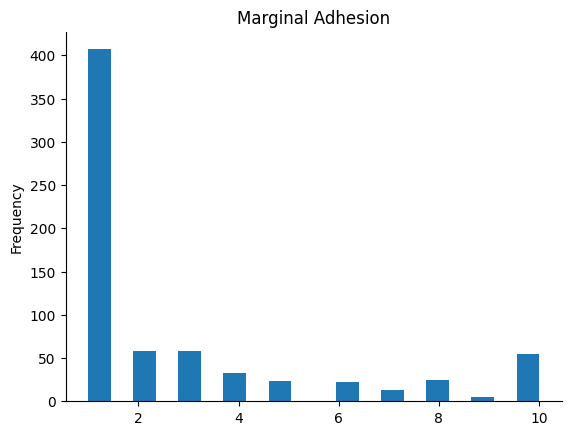

In [131]:
# @title Marginal Adhesion

from matplotlib import pyplot as plt
df['Marginal Adhesion'].plot(kind='hist', bins=20, title='Marginal Adhesion')
plt.gca().spines[['top', 'right',]].set_visible(False)

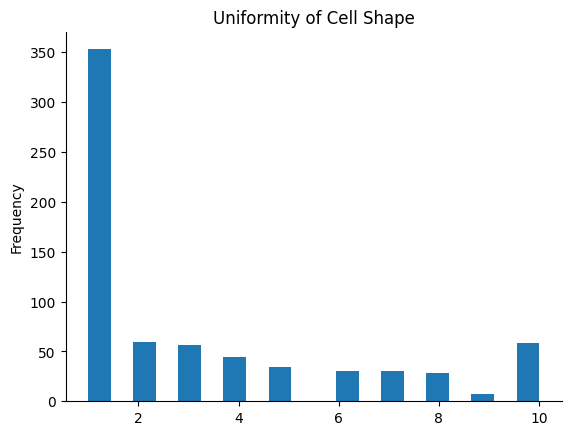

In [132]:
# @title Uniformity of Cell Shape

from matplotlib import pyplot as plt
df['Uniformity of Cell Shape'].plot(kind='hist', bins=20, title='Uniformity of Cell Shape')
plt.gca().spines[['top', 'right',]].set_visible(False)

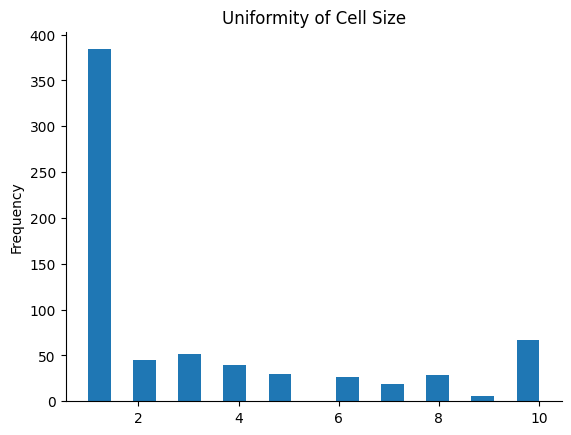

In [133]:
# @title Uniformity of Cell Size

from matplotlib import pyplot as plt
df['Uniformity of Cell Size'].plot(kind='hist', bins=20, title='Uniformity of Cell Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

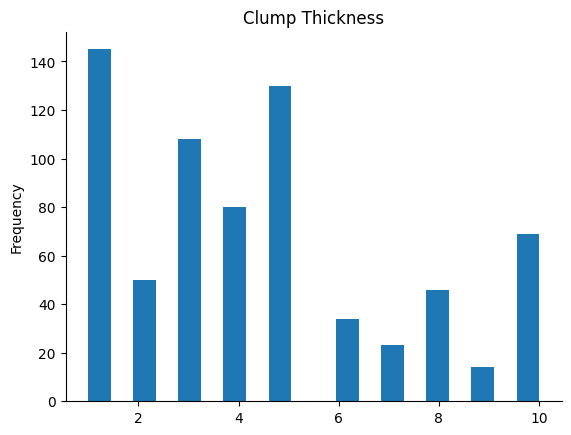

In [134]:
# @title Clump Thickness

from matplotlib import pyplot as plt
df['Clump Thickness'].plot(kind='hist', bins=20, title='Clump Thickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [135]:
# Replacing '?' with NaN
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', np.nan)

# Checking again
print(df['Bare Nuclei'].isna().sum())  # Should now show actual missing values

16


In [136]:
# Converting to numeric, forcing errors (like '?') to NaN
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

# Checking for missing values (should be 16)
print(df['Bare Nuclei'].isna().sum())

# Filling missing values with the median
median_value = df['Bare Nuclei'].median()
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(median_value)

# Converting to integer (optional but useful)
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

16


In [137]:
# Filling NaN with median
median_value = df['Bare Nuclei'].median()
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(median_value)

# Converting to integer type
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [138]:
# Checking again
print(df['Bare Nuclei'].isna().sum())  # Should now show actual missing values

0


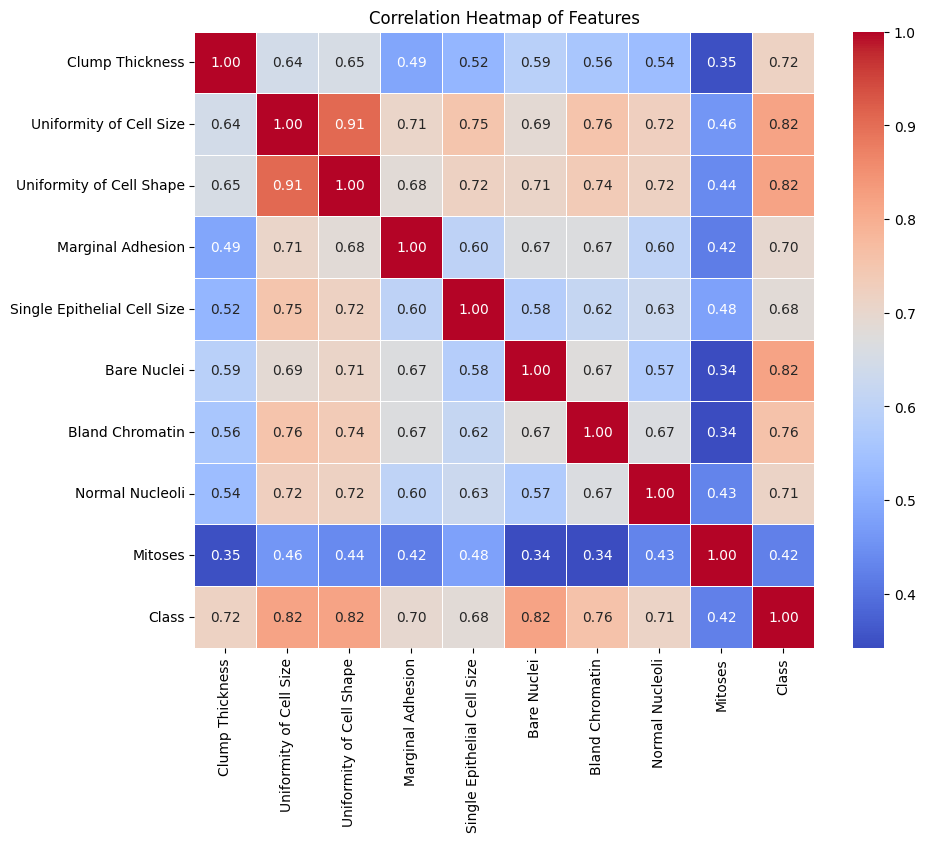

In [139]:
# Computing correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Features")
plt.show()

### **Top Correlated Features with Class (Target)**

These features show the strongest linear relationships with the Class label (malignant vs. benign):

| Feature                  | Correlation with Class |
|--------------------------|------------------------|
| Uniformity of Cell Size  | 0.82                   |
| Uniformity of Cell Shape | 0.82                   |
| Bare Nuclei              | 0.82                   |
| Bland Chromatin          | 0.76                   |
| Clump Thickness          | 0.72                   |
| Normal Nucleoli          | 0.71                   |

*These are likely to be the most predictive features for our classification model.*

---

## Multicollinearity Check

Some features are highly correlated with each other, which may indicate redundancy:

| Feature Pair                                  | Correlation |
|-----------------------------------------------|-------------|
| Uniformity of Cell Size & Shape               | 0.91        |
| Bland Chromatin & Uniformity of Cell Size     | 0.76        |
| Bland Chromatin & Uniformity of Cell Shape    | 0.74        |
| Bare Nuclei & Uniformity of Cell Shape        | 0.71        |

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


## **PCA**

In [141]:
X = df.drop(columns=['Class'])  # Features only
y = df['Class']                 # Target

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Applying PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

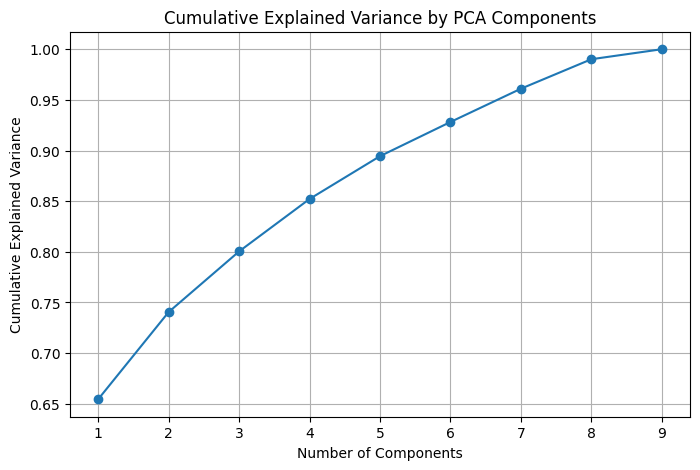

In [142]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [143]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)

print(f"Reduced to {X_reduced.shape[1]} components")

Reduced to 7 components


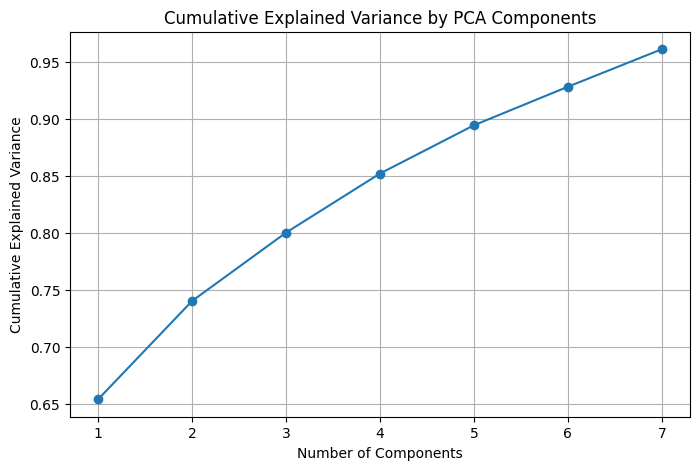

In [144]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [146]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [147]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.96      0.99      0.97       143
           4       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



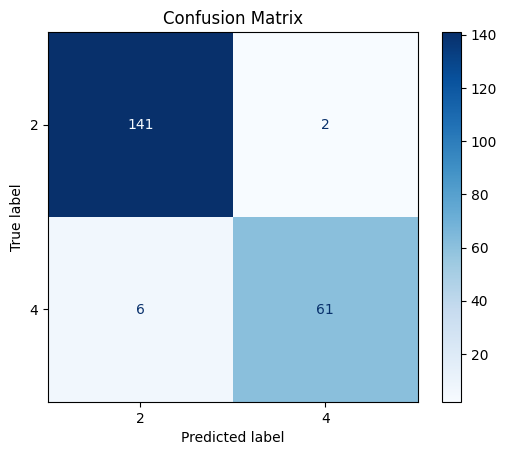

In [148]:
# Assuming y_test are true labels and y_pred are predictions
cm = confusion_matrix(y_test, y_pred, labels=[2, 4])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2, 4])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [149]:
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[2, 4])

# Converting to DataFrame for better readability
cm_df = pd.DataFrame(cm, index=['Actual 2', 'Actual 4'], columns=['Predicted 2', 'Predicted 4'])

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
          Predicted 2  Predicted 4
Actual 2          141            2
Actual 4            6           61


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Fitting SMOTE on training data only to avoid data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", sorted(pd.Series(y_train).value_counts().items()))
print("After SMOTE:", sorted(pd.Series(y_train_resampled).value_counts().items()))

Before SMOTE: [(2, 315), (4, 174)]
After SMOTE: [(2, 315), (4, 315)]


In [151]:
# Initializing and train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predicting on test data
y_pred = logreg.predict(X_test)

# Evaluating performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

Confusion Matrix:
 [[141   2]
 [  5  62]]


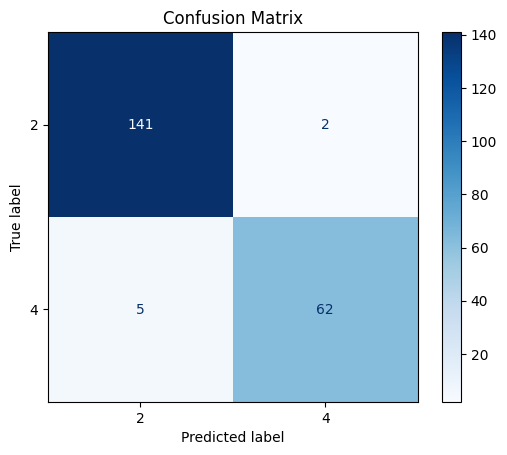

In [152]:
cm = confusion_matrix(y_test, y_pred, labels=[2, 4])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2, 4])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **Model Training – Logistic Regression**

### Initial Model (Before SMOTE)

**Train-Test Split:**  
- Train: 70%, Test: 30%

**Classification Report (Before SMOTE):**
```
Precision  Recall  F1-Score
Class 2:    0.96     0.99     0.97
Class 4:    0.97     0.91     0.94
Accuracy: 0.96
```

**Confusion Matrix:**
```
Actual \ Pred |   2   |   4
--------------|-------|------
2             | 141   |  2
4             |  6    | 61
```

**Observation**: Class 4 (minority) had **lower recall** (0.91), indicating misclassifications due to class imbalance.

---

## 5. Handling Class Imbalance with SMOTE

### SMOTE Summary:
- **Before SMOTE**: Class 2 → 315, Class 4 → 174  
- **After SMOTE**: Class 2 → 315, Class 4 → 315 (balanced)

```python
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
```

---

## 6. Logistic Regression (After SMOTE)

**Classification Report (After SMOTE):**
```
Precision  Recall  F1-Score
Class 2:    0.97     0.99     0.98
Class 4:    0.97     0.93     0.95
Accuracy: 0.97
```

**Confusion Matrix:**
```
Actual \ Pred |   2   |   4
--------------|-------|------
2             | 141   |  2
4             |  5    | 62
```

### Improvement Observed:
- Accuracy improved: **96% → 97%**
- Recall for Class 4 improved: **0.91 → 0.93**
- F1-Score for Class 4 improved: **0.94 → 0.95**

---

## 7. Conclusion

- Logistic Regression with SMOTE improved performance on minority class.
- Balanced dataset led to better generalization.
- PCA helped reduce dimensionality with minimal loss in variance.
- Model is now more robust and fair across both classes.

In [153]:
# 1. Training SVM on resampled data
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train_resampled, y_train_resampled)

# 2. Predicting on test set
y_pred_svm = svm.predict(X_test)

# 3. Evaluating performance
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           2       0.99      0.97      0.98       143
           4       0.94      0.99      0.96        67

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.97       210
weighted avg       0.98      0.98      0.98       210

Confusion Matrix:
 [[139   4]
 [  1  66]]


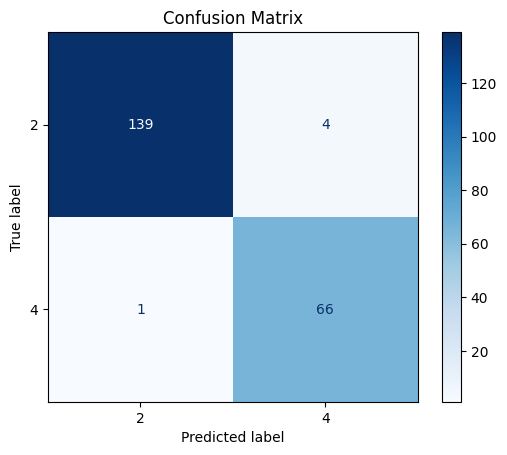

In [154]:
cm = confusion_matrix(y_test, y_pred_svm, labels=[2, 4])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2, 4])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **SVM (RBF Kernel) Evaluation**

### Classification Report:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **2** | 0.99      | 0.97   | 0.98     | 143     |
| **4** | 0.94      | 0.99   | 0.96     | 67      |

- **Accuracy**: 0.98  
- **Macro Avg F1**: 0.97  
- **Weighted Avg F1**: 0.98  

### Confusion Matrix:

```
              Predicted
            |   2   |   4
      ---------------------
Actual  2   |  139  |   4
        4   |   1   |  66
```

---

## Comparison with Logistic Regression

| Metric        | Logistic Regression | SVM (RBF) |
|---------------|---------------------|-----------|
| Accuracy      | 0.97                | 0.98      |
| F1-score (2)  | 0.98                | 0.98      |
| F1-score (4)  | 0.95                | 0.96      |
| Misclassified | 7                   | **5**     |


In [155]:
# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the SMOTE-resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       143
           4       0.94      0.97      0.96        67

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210

Confusion Matrix:
[[139   4]
 [  2  65]]


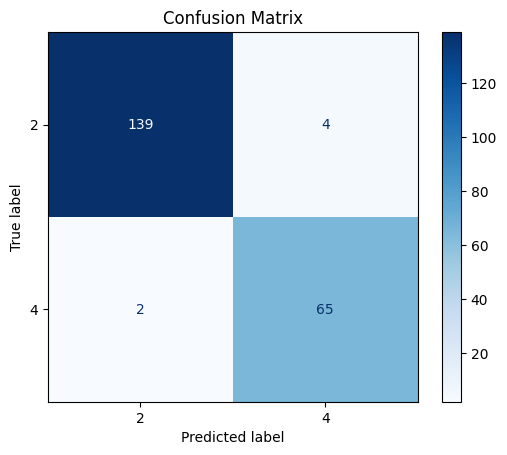

In [156]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf, labels=[2, 4])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2, 4])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### **Model Evaluation Report**

---

## 1. Logistic Regression

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 2     | 0.97      | 0.99   | 0.98     | 143     |
| 4     | 0.97      | 0.93   | 0.95     | 67      |

**Accuracy:** 0.97

**Macro Avg:**
- Precision: 0.97
- Recall: 0.96
- F1-Score: 0.96

**Weighted Avg:**
- Precision: 0.97
- Recall: 0.97
- F1-Score: 0.97

### Confusion Matrix

| Actual \ Predicted | 2   | 4   |
|--------------------|-----|-----|
| **2**              | 141 | 2   |
| **4**              | 5   | 62  |

---

## 2. Support Vector Machine (RBF Kernel)

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 2     | 0.99      | 0.97   | 0.98     | 143     |
| 4     | 0.94      | 0.99   | 0.96     | 67      |

**Accuracy:** 0.98

**Macro Avg:**
- Precision: 0.97
- Recall: 0.98
- F1-Score: 0.97

**Weighted Avg:**
- Precision: 0.98
- Recall: 0.98
- F1-Score: 0.98

### Confusion Matrix

| Actual \ Predicted | 2   | 4   |
|--------------------|-----|-----|
| **2**              | 139 | 4   |
| **4**              | 1   | 66  |

---

## 3. Random Forest

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 2     | 0.99      | 0.97   | 0.98     | 143     |
| 4     | 0.94      | 0.97   | 0.96     | 67      |

**Accuracy:** 0.97

**Macro Avg:**
- Precision: 0.96
- Recall: 0.97
- F1-Score: 0.97

**Weighted Avg:**
- Precision: 0.97
- Recall: 0.97
- F1-Score: 0.97

### Confusion Matrix

| Actual \ Predicted | 2   | 4   |
|--------------------|-----|-----|
| **2**              | 139 | 4   |
| **4**              | 2   | 65  |

---

## Model Comparison Summary

| Metric      | Logistic Regression | SVM (RBF) | Random Forest |
|-------------|---------------------|-----------|---------------|
| Accuracy    | 0.97                | **0.98**  | 0.97          |
| Precision (Class 2) | 0.97          | 0.99      | 0.99          |
| Recall (Class 2)    | 0.99          | 0.97      | 0.97          |
| F1-Score (Class 2)  | 0.98          | 0.98      | 0.98          |
| Precision (Class 4) | 0.97          | 0.94      | 0.94          |
| Recall (Class 4)    | 0.93          | **0.99**  | 0.97          |
| F1-Score (Class 4)  | 0.95          | 0.96      | 0.96          |

---

## Insights

- **SVM** with RBF kernel achieved the highest overall accuracy (98%) and performed best in recall for class 4 (malignant cases), which is crucial for minimizing false negatives.
- **Logistic Regression** and **Random Forest** performed similarly with 97% accuracy.
- Logistic Regression had slightly better recall for class 2 (benign cases), but SVM performed better for malignant detection.
- The confusion matrices confirm these insights, showing fewer misclassifications of malignant cases by SVM.

---


In [157]:
# y_test, y_pred_logreg, y_pred_svm, y_pred_rf, y_pred_other
# Logistic Regression accuracy
accuracy_logreg = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

# SVM accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM (RBF kernel) Accuracy: {accuracy_svm:.4f}")

# Random Forest accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Logistic Regression Accuracy: 0.9667
SVM (RBF kernel) Accuracy: 0.9762
Random Forest Accuracy: 0.9714


### **Model Accuracy Comparison**

| Model                | Accuracy |
|----------------------|----------|
| Logistic Regression   | 0.9667   |
| SVM (RBF Kernel)     | 0.9762   |
| Random Forest        | 0.9714   |

**Summary:**  
- The SVM model with RBF kernel achieved the highest accuracy at 97.62%.  
- Random Forest performed close behind with 97.14%.  
- Logistic Regression also gave strong results with 96.67% accuracy.


In [158]:
# For Logistic Regression
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]  # probability of positive class

# For Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# For SVM - only if trained with probability=True
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]

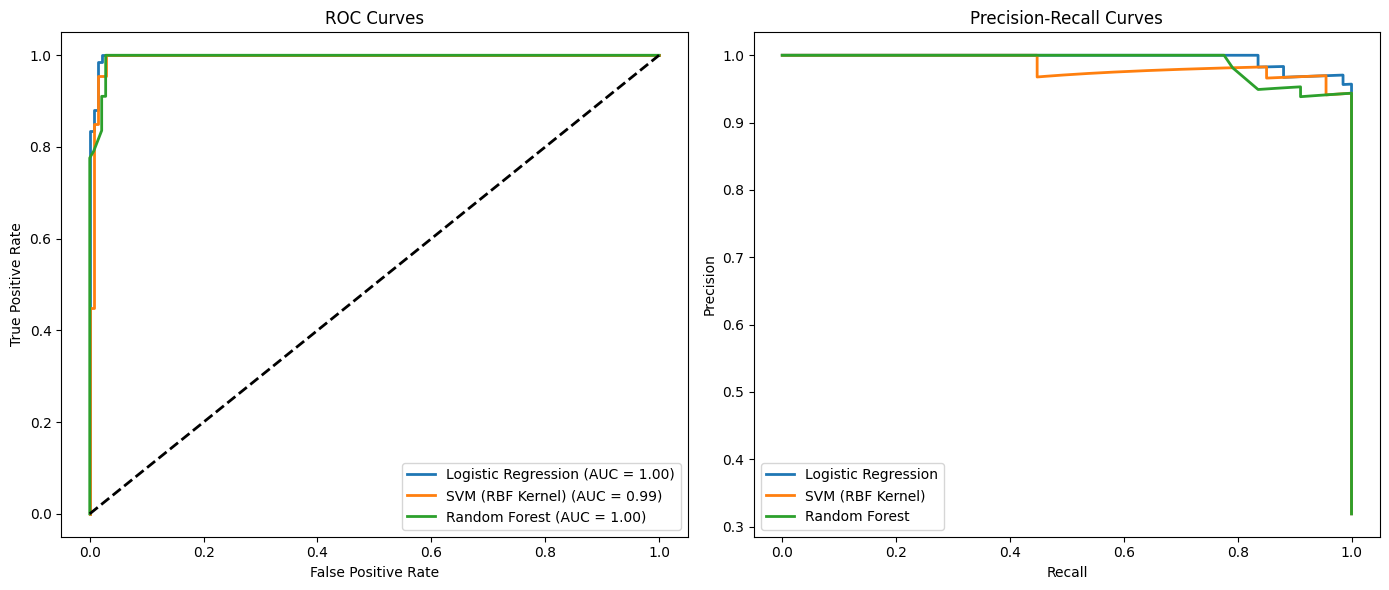

In [159]:
# - y_test: true labels of test set
# - y_pred_proba_logreg: predicted probabilities for Logistic Regression (class 1)
# - y_pred_proba_svm: predicted probabilities for SVM (class 1)
# - y_pred_proba_rf: predicted probabilities for Random Forest (class 1)

models = {
    "Logistic Regression": y_pred_proba_logreg,
    "SVM (RBF Kernel)": y_pred_proba_svm,
    "Random Forest": y_pred_proba_rf
}

plt.figure(figsize=(14, 6))

# ROC Curve Plot
plt.subplot(1, 2, 1)
for name, y_pred_proba in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=4)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve Plot
plt.subplot(1, 2, 2)
for name, y_pred_proba in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba, pos_label=4) # Add pos_label here too for consistency and clarity

    plt.plot(recall, precision, lw=2, label=name)

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

### **Model Evaluation Report**

This report evaluates the performance of three classification models using ROC and Precision-Recall curves.

## Models Evaluated
- **Logistic Regression**
- **SVM (RBF Kernel)**
- **Random Forest**

---

## 1. ROC Curve Analysis

**ROC (Receiver Operating Characteristic) Curves** evaluate the trade-off between the True Positive Rate (Recall) and False Positive Rate.

| Model                  | AUC (Area Under Curve) |
|------------------------|------------------------|
| Logistic Regression    | **1.00**               |
| SVM (RBF Kernel)       | **0.99**               |
| Random Forest          | **1.00**               |

**Interpretation:**
- All models perform extremely well with AUCs close to or equal to 1.0.
- Logistic Regression and Random Forest achieved perfect separation between classes (AUC = 1.00).
- SVM (RBF) also performed excellently with an AUC of 0.99.
- These results indicate **strong discriminatory power**.

---

## 2. Precision-Recall Curve Analysis

**Precision-Recall (PR) Curves** are especially useful for imbalanced datasets and measure the trade-off between Precision and Recall.

**Observations:**
- All models maintain high precision across a broad range of recall values.
- Logistic Regression and Random Forest outperform or closely match the SVM model.
- The PR curves show that all models are **highly precise and sensitive**, suitable for tasks where both false positives and false negatives are costly.

---

## 3. Conclusion

- **Logistic Regression** and **Random Forest** show **perfect or near-perfect performance**, raising the possibility of overfitting.
- **SVM (RBF Kernel)**, while slightly behind, still offers **excellent performance**.
- All models are effective; however, additional checks like **cross-validation**, **confusion matrix analysis**, and **testing on unseen data** are recommended to ensure generalization.